<a href="https://colab.research.google.com/github/ucfilho/Disciplina_Metodos_Numericos_2020/blob/master/Mod_03_class_13_Shooting_Methods_PVC_OUT_20_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# http://folk.ntnu.no/leifh/teaching/tkt4140/._main036.html
# http://folk.ntnu.no/leifh/teaching/tkt4140/._main028.html#ch:2

In [5]:
import numpy as np
from matplotlib.pyplot import plot, show, legend,  rcParams,rc, figure, axhline, close, xticks, xlabel, ylabel, savefig, axis, grid

# change some default values to make plots more readable 
LNWDT=3; FNT=11
rcParams['lines.linewidth'] = LNWDT; rcParams['font.size'] = FNT
font = {'size' : 16}; rc('font', **font)

# define rk4 scheme
def rk4(func, z0, time):
    """The Runge-Kutta 4 scheme for solution of systems of ODEs.
    z0 is a vector for the initial conditions,
    the right hand side of the system is represented by func which returns
    a vector with the same size as z0 ."""

    z = np.zeros((np.size(time),np.size(z0)))
    z[0,:] = z0
    zp = np.zeros_like(z0)

    for i, t in enumerate(time[0:-1]):
        dt = time[i+1] - time[i]
        dt2 = dt/2.0
        k1 = np.asarray(func(z[i,:], t))                # predictor step 1
        k2 = np.asarray(func(z[i,:] + k1*dt2, t + dt2)) # predictor step 2
        k3 = np.asarray(func(z[i,:] + k2*dt2, t + dt2)) # predictor step 3
        k4 = np.asarray(func(z[i,:] + k3*dt, t + dt))   # predictor step 4
        z[i+1,:] = z[i,:] + dt/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4) # Corrector step

    return z



beta:  6.004429715251834 alpha 0.7142857142857143
rstar 640.2003629423818 sstar -62.33380265534111


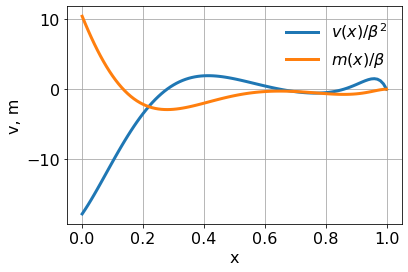

In [6]:
# src-ch2/tank2.py;ODEschemes.py @ git@lrhgit/tkt4140/src/src-ch2/ODEschemes.py;
from numpy import cos, sin
import numpy as np
from matplotlib.pyplot import *

# change some default values to make plots more readable 
LNWDT=3; FNT=11
rcParams['lines.linewidth'] = LNWDT; rcParams['font.size'] = FNT
font = {'size' : 16}; rc('font', **font)


def tank2(y, x):
    """Differential equation for the displacement w in a cylindrical tank with linearly varying wall-thickness
    Args:
        y(array): an array containg w and its derivatives up to third order.
        x(array): independent variable
    Returns:
        dydx(array): RHS of the system of first order differential equations 
    """
    z = 1-alpha*x
    dydx = np.zeros_like(y)
    dydx[0] = y[1]
    dydx[1] = y[2]
    dydx[2] = y[3]
    temp = (6*alpha/z)*y[3]- (6*alpha**2/z**2)*y[2]
    dydx[3] = temp - 4*beta4*y[0]/z**2 - 4*beta4*(1-x)/z**3
    
    return dydx

R = 8.5 # radius [m]
H = 7.95 # height [m]
t0 = 0.35 # thickness [m]
t1 = 0.1 # thickness [m]
ny = 0.2 # poissons number 
beta = H*(3*(1-ny**2)/(R*t0)**2)**0.25
beta4 = beta**4
alpha = (t0-t1)/t0
N = 100
print("beta: ", beta, "alpha", alpha)

X = 1.0
x = np.linspace(0,X,N + 1) 

solverList = [euler, heun, rk4] #list of solvers
solver = solverList[2] # select specific solver

# shoot:
s = np.array([0, 0, 1])
r = np.array([0, 1, 0])
phi = np.zeros(3)
psi = np.zeros(3)
for k in range(3):
    y0 = np.array([0,0,s[k],r[k]])
    y = solver(tank2,y0,x)
    phi[k] = y[-1, 2]
    psi[k]=y[-1, 3]

# calculate correct r and s    
denominator = (psi[2] - psi[0])*(phi[1] - phi[0]) - (phi[2] - phi[0])*(psi[1] - psi[0])
rstar = (phi[2]*psi[0] - psi[2]*phi[0])/denominator
sstar = (psi[1]*phi[0] - phi[1]*psi[0])/denominator

print('rstar', rstar, 'sstar', sstar)

# compute the correct solution with the correct initial guesses
y0 = np.array([0, 0, sstar, rstar])
y = solver(tank2,y0,x)

legends=[] # empty list to append legends as plots are generated
plot(x,-y[:,3]/beta**2)
plot(x,-y[:,2]/beta)
legends.append(r'$v(x)/\beta^2$')
legends.append(r'$m(x)/\beta$')

# Add the labels
legend(legends,loc='best',frameon=False) # Add the legends
ylabel('v, m')
xlabel('x')
grid(b=True, which='both', color='0.65',linestyle='-')
show()